Using TensorFlow backend.


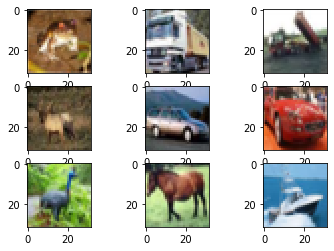

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from PIL import Image
#load data
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()
#create grid of 3x3 image
for i in range(0,9):
    plt.subplot(330+1+i)
    plt.imshow(Image.fromarray(X_train[i]))
plt.show()

In [2]:
import numpy as np
from keras.datasets import cifar10 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.layers import Flatten 
from keras.constraints import maxnorm 
from keras.optimizers import SGD 
from keras.layers.convolutional import Convolution2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.utils import np_utils


In [3]:
#fix seed
seed = 7
np.random.seed(seed)

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
# normalize inputs from 0-255 to 0.0-1.0 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.0


In [6]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]


In [7]:
# Create the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32,3), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) 
# Compile model
epochs = 10 #designed to be 25. only doing 10 to save time
lrate = 0.01 
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same", kernel_constraint=<keras.con...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same", kernel_constraint=<keras.con...)`
  """
C:\Users\gjjim\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_constraint=<keras.con...)`
  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

In [8]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=epochs, batch_size=32) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1]*100))
#too much computation, but you get the idea~


C:\Users\gjjim\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 218s 4ms/step - loss: 1.7318 - accuracy: 0.3742 - val_loss: 1.3933 - val_accuracy: 0.4969
Epoch 2/10
50000/50000 [==============================] - 219s 4ms/step - loss: 1.3684 - accuracy: 0.5085 - val_loss: 1.2366 - val_accuracy: 0.5663
Epoch 3/10
50000/50000 [==============================] - 213s 4ms/step - loss: 1.2158 - accuracy: 0.5677 - val_loss: 1.1450 - val_accuracy: 0.5977
Epoch 4/10
38240/50000 [=====================>........] - ETA: 48s - loss: 1.1167 - accuracy: 0.6031

KeyboardInterrupt: 

In [ ]:
#make it larger with more layers
#conv,dropout,conv,pool,(repeat),conv, pool, flatten,Dense,dropout,(repeat),Dense
# Create the model
model = Sequential()
model.add(Conv2D(32,(3,3)),input_shape=(3,22,22),activation='relu',border_mode='same')
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3)),activation='relu',border_mode='same')
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Flatten())
model.add(Dense(1024),activation='relu',W_constraint=maxnorm(3))
model.add(Dropout(0.2))
model.add(Dense(512),activation='relu',W_constraint=maxnorm(3))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))
#...... same compile,fit and evaluate